# Self-fulfilling Debt Dilution in Discrete Time

The setup follows Aguiar and Amador (19), [Self-fulfilling Debt Dilution: Maturity and Multiplicity in Debt Models](http://amadormanuel.me/files/self_fulfilling_dilution.pdf), but in discrete time and with concave utility. 

Time is discrete. The government's utility is denoted by $u$. The government borrows using a long-duration exponential bond with decay rate $1 - \delta$. The bonds pay a coupon of $(r + \delta)$ every period, so tht the risk free price is $1$. 

The government's default outside option takes on two values (high and low). At the beginning of every period, there is a probability $\lambda$ that the outside option is high. This realization is i.i.d. We denote by $\overline V$, the high outside option; and by $\underline V$, the low one. 

Conditional on no default today, the value to a government that enters the period with $b$ bonds is:
$$
    V(b) = u(c) + \beta \lambda \max\{V(b'), \overline V\} + 
    \beta (1 - \lambda) \max \{ V(b'), \underline V\} 
$$
subject to:
$$
    y + q(b') (b' - (1 - \delta) b) = c + (r + \delta) b
$$
We let $B(b)$ denote the debt policy function associated with this problem. 

We impose that when indifferent, the country repays. So, default is then given by:
$$
    D(b, V_D) = \begin{cases}
      0 &, \text{ if } V(b) \ge V_D \\ 
      1 &, \text{ otherwise }  
    \end{cases}
$$

The ex-ante probability of default is then 
$$
    D(b) = \lambda D(b, \overline V) + (1-\lambda) D(b, \underline V)
$$

Conditional on no default today, and an amount $b$ of bonds issued, the price of a bond is:
$$
    q(b) = (1 - D(b)) \left[
      \frac{  (r + \delta) + (1 - \delta) q (B(b)) }
      { 1 + r}
    \right]
$$

A Markov equilibrium is defined as a value function $V$, a price function $q$, a debt policy function $B$, and a default function $D$, such that the above equations are all satisfied. 

We use the code in "two_states_long_bond_jl" to

(i) construct the borrowing, savings, and hybrid equilibrium; 

(ii) confirm with value iteration that they are indeed equilibria; and 

(iii) analyze whether iterating backwards from a final T converges to a particular type of equilibria. 


## Code

In [1]:
using Pkg; Pkg.activate("."); Pkg.instantiate()
using ProgressMeter
using LaTeXStrings

  Activating project at `c:\Users\manue\GitHub\dilution_with_two_shocks`


In [2]:
include("two_states_long_bond.jl");

In [3]:
m = TwoStatesModel()

R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.25 y=1.0 points=10001

For this parameterization we can construct the three equilibrium objects. 

In [4]:
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m);

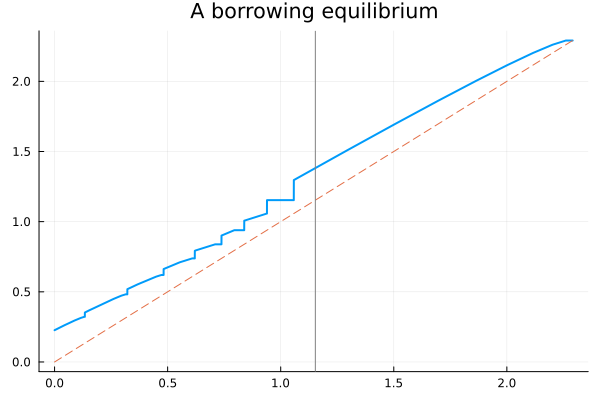

In [5]:
p = plot_pol(bor)
title!(p, "A borrowing equilibrium")

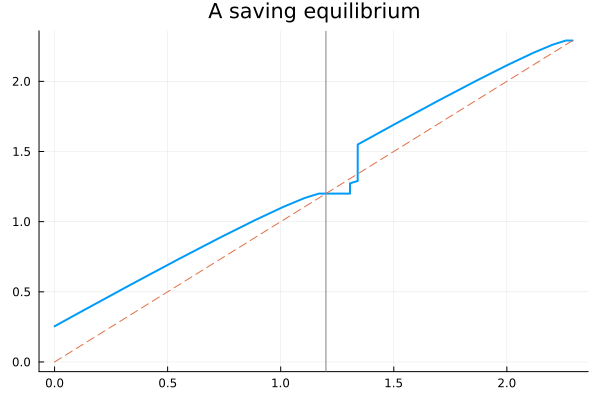

In [6]:
p = plot_pol(sav)
title!(p, "A saving equilibrium")

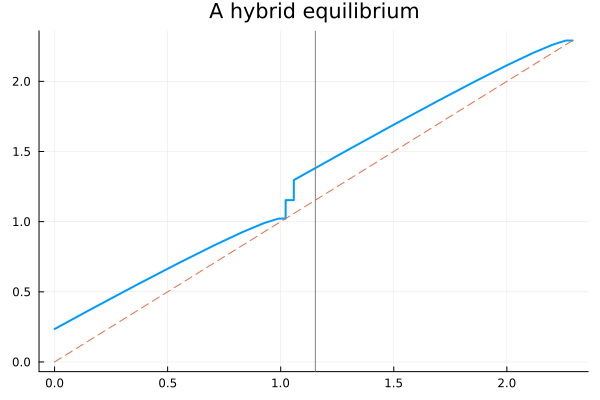

In [7]:
p = plot_pol(hyb)
title!(p, "A hybrid equilibrium")

### Checking the accuracy of the constructed equiilbria

The following checks whether the construction are indeed equilibria. It does so by iterating the value and policies functions once. 

In [8]:
a_tmp = Alloc(m);

In [9]:
for x in [bor, sav, hyb]
    iterate_v_and_pol!(a_tmp, x)
    println(maximum(abs.(a_tmp.v .- x.v)))
end

2.220446049250313e-16
2.220446049250313e-16
5.416105215538813e-6


The savings and the borrowing are indeed equilibria. 
The hybrid does not seem to be an equilibrium in discrete time for this parameterization. 

### Iterating backwards from a finite T

Let's explore what happens if we iterate backwards from a finite T.

Iter 10. Distance=0.8935087730528108
Iter 20. Distance=0.9372484187902833
Iter 30. Distance=0.9278233763045658
Iter 40. Distance=0.9225090910706572
Iter 50. Distance=0.9199582161299841
Iter 60. Distance=0.9187482770674101
Iter 70. Distance=0.9181714423231777
Iter 80. Distance=0.9178955019193893
Iter 90. Distance=0.9177653562679403
Iter 100. Distance=0.9177007587658533
Iter 110. Distance=0.04006248886802155
Iter 120. Distance=0.04000844192929376
Iter 130. Distance=0.0399991180641891
Iter 140. Distance=0.03996063196328048
Iter 150. Distance=0.03995870856487094
Iter 160. Distance=1.1633812916078679e-5
Iter 170. Distance=0.0399489406874709
Iter 180. Distance=0.03994397122368565
Iter 190. Distance=1.7563430517175682e-6
Iter 200. Distance=7.629351435056719e-7
Iter 210. Distance=3.314102178242351e-7
Iter 220. Distance=1.4396077244183125e-7
Iter 230. Distance=6.253489764906917e-8
Iter 240. Distance=2.7164437754745308e-8
Iter 250. Distance=1.1799918264721043e-8
Iter 260. Distance=5.125748492318

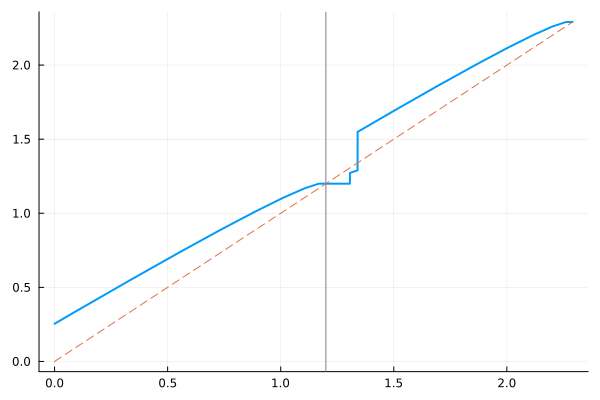

In [10]:
iter_out = iterate_backwards(m)
plot_pol(iter_out)

In this case we have converged to the savings equilibrium.

## Another parameter specification

Now we try a different parameterization.

In [11]:
m = TwoStatesModel(δ=0.20)

R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.2 y=1.0 points=10001

In [12]:
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m);

In [13]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.8295420201127871
Iter 20. Distance=0.9183371365679885
Iter 30. Distance=0.9126940285699653
Iter 40. Distance=0.9076233893925599
Iter 50. Distance=0.9050876016180278
Iter 60. Distance=0.903878796772447
Iter 70. Distance=0.9033021072832198
Iter 80. Distance=0.9030251763572491
Iter 90. Distance=0.9028957230167208
Iter 100. Distance=0.9028313589481531
Iter 110. Distance=0.004585830440413885
Iter 120. Distance=0.004536807402520729
Iter 130. Distance=5.996306629008075e-6
Iter 140. Distance=0.013446046793847866
Iter 150. Distance=7.937888598097409e-7
Iter 160. Distance=2.676883251173656e-7
Iter 170. Distance=9.027216574253316e-8
Iter 180. Distance=1.4581349461195714e-6
Iter 190. Distance=1.0266034577988137e-8
Iter 200. Distance=3.462000575105151e-9
Iter 210. Distance=1.1674859412558192e-9
Iter 220. Distance=3.9370950943862226e-10
Iter 230. Distance=1.3277012822499046e-10
Iter 240. Distance=4.477385129320055e-11
Iter 250. Distance=1.509903313490213e-11
Iter 260. Distance=5.

Alloc for model: R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.2 y=1.0 points=10001

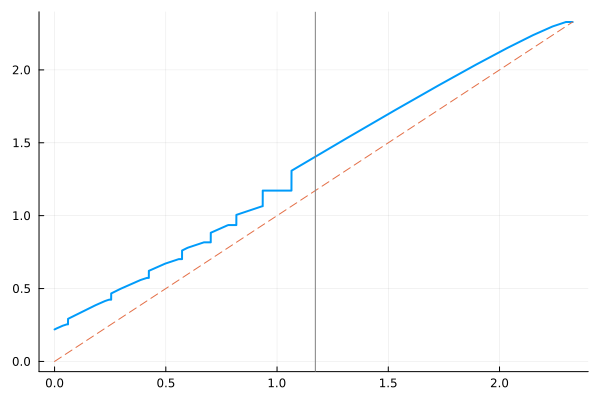

In [14]:
plot_pol(iter_out)

An again we converge to the borrowing equilibrium. 

#### A note on the hybrid for this specification

In [15]:
a_tmp = Alloc(m)

for x in [bor, sav, hyb]
    iterate_v_and_pol!(a_tmp, x)
    println(maximum(abs.(a_tmp.v .- x.v)))
end

0.0
1.1102230246251565e-16
1.1102230246251565e-16


For this parameterization, the hybrid seems to be an equilibrium. 

## A Case when Only Borrowing is an Equilibrium

In [16]:
m = TwoStatesModel(δ = 0.05)

R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.05 y=1.0 points=10001

In [17]:
bor = create_bor_eqm(m)

Alloc for model: R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.05 y=1.0 points=10001

In [18]:
sav = create_sav_eqm(m)

AssertionError: AssertionError: crisis_borrowing.alloc.v[bS_low_loc] <= vH

No savings equilibrium in this case

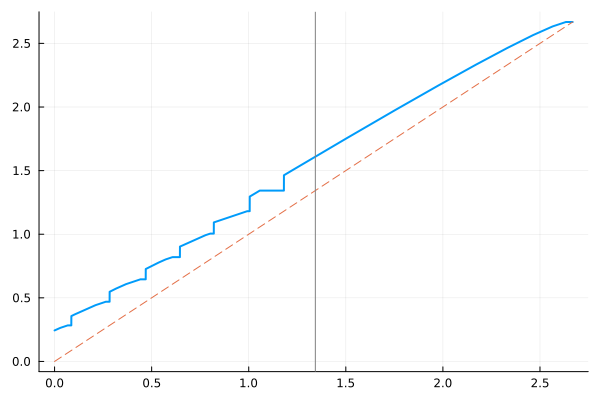

In [19]:
plot_pol(bor)

In [20]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.11515800510632956
Iter 20. Distance=0.7165737890096207
Iter 30. Distance=0.7694178831735702
Iter 40. Distance=0.7846618968486704
Iter 50. Distance=0.7879437711882702
Iter 60. Distance=0.7883670593191884
Iter 70. Distance=0.7882417091051538
Iter 80. Distance=0.7880896833213922
Iter 90. Distance=0.020296236458307693
Iter 100. Distance=0.018324592911641013
Iter 110. Distance=0.012285252011371012
Iter 120. Distance=0.010076855416056296
Iter 130. Distance=6.5354345760715304e-6
Iter 140. Distance=0.018280236752484025
Iter 150. Distance=8.685666083030341e-7
Iter 160. Distance=2.933073021682553e-7
Iter 170. Distance=9.90262687405874e-8
Iter 180. Distance=3.342720872323568e-8
Iter 190. Distance=1.128194704325125e-8
Iter 200. Distance=3.807259618682224e-9
Iter 210. Distance=1.2846775865327231e-9
Iter 220. Distance=4.334470005140645e-10
Iter 230. Distance=1.4623291466620003e-10
Iter 240. Distance=4.9331205786984356e-11
Iter 250. Distance=1.664102189380401e-11
Iter 260. Distanc

Alloc for model: R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.05 y=1.0 points=10001

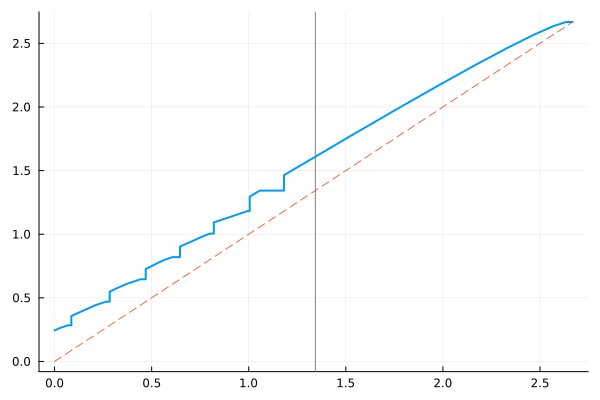

In [21]:
plot_pol(iter_out)

Iterating backwards converges to the borrowing equilibrium. 

## A Case where Only Saving is an Equilibrium

In [22]:
m = TwoStatesModel(δ = 0.5)

R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.5 y=1.0 points=10001

In [23]:
sav = create_sav_eqm(m)

Alloc for model: R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.5 y=1.0 points=10001

In [24]:
bor = create_bor_eqm(m)

AssertionError: AssertionError: bor_eqm.valid_until == 1

There is no borrowing equilibrium for this parameterization.

In [25]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.9975995363891447
Iter 20. Distance=0.9749145987077225
Iter 30. Distance=0.9635661860810594
Iter 40. Distance=0.9581991836025239
Iter 50. Distance=0.9556448668605559
Iter 60. Distance=0.9544346649586799
Iter 70. Distance=0.9538577547047842
Iter 80. Distance=0.9535817891908678
Iter 90. Distance=0.9534516350810835
Iter 100. Distance=0.9533870347268592
Iter 110. Distance=0.02516609112860224
Iter 120. Distance=0.011759678978382593
Iter 130. Distance=0.010140873354268165
Iter 140. Distance=0.010066192418311082
Iter 150. Distance=2.1666179151558218e-5
Iter 160. Distance=1.3862626426275337e-5
Iter 170. Distance=0.025006021764864772
Iter 180. Distance=6.383230522488681e-6
Iter 190. Distance=2.772801639849831e-6
Iter 200. Distance=1.2044730183513597e-6
Iter 210. Distance=5.232091727369603e-7
Iter 220. Distance=2.2727602400074431e-7
Iter 230. Distance=9.872608097705182e-8
Iter 240. Distance=4.288546985586894e-8
Iter 250. Distance=1.862895321336211e-8
Iter 260. Distance=8.09220

Alloc for model: R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.5 y=1.0 points=10001

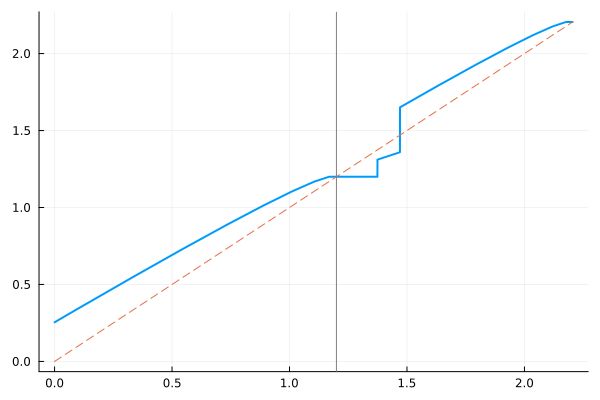

In [26]:
plot_pol(iter_out)

Iterating backwards in this case converges to the savings equilibrium. 

## But sometimes iteration converges to the borrowing eqm when they are multiple ones

Let's increase the maturity -- so now we have multiple equilibria.

In [27]:
m = TwoStatesModel(δ=0.15, β=0.91, τH=0.15, τL=0.08, λ=0.025)

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

In [28]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.7742414540393174
Iter 20. Distance=0.8897494549354081
Iter 30. Distance=0.8917655451835697
Iter 40. Distance=0.8869190168129731
Iter 50. Distance=0.8840704500000647
Iter 60. Distance=0.8826477784535248
Iter 70. Distance=0.8819713163679498
Iter 80. Distance=0.881646105816957
Iter 90. Distance=0.8814956545891218
Iter 100. Distance=0.02265007445869871
Iter 110. Distance=0.007924462095842744
Iter 120. Distance=0.004232003097927872
Iter 130. Distance=8.430924612223833e-6
Iter 140. Distance=0.0052094183078636586
Iter 150. Distance=9.435359292764289e-7
Iter 160. Distance=2.852453167556668e-7
Iter 170. Distance=8.623401442919842e-8
Iter 180. Distance=2.606985910480475e-8
Iter 190. Distance=7.88131648832291e-9
Iter 200. Distance=2.382642527720691e-9
Iter 210. Distance=7.203093677077277e-10
Iter 220. Distance=2.1776064285106145e-10
Iter 230. Distance=6.583245060198806e-11
Iter 240. Distance=1.9902191006337944e-11
Iter 250. Distance=6.016742659653573e-12
Iter 260. Distance=1.8

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

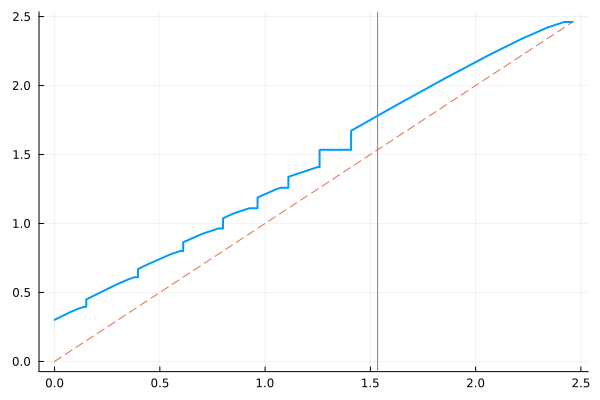

In [29]:
plot_pol(iter_out)

Iterating backwards converges to the borrowing equilibrium in this example.

But savings is also an equilibrium .. 

In [30]:
sav = create_sav_eqm(m)

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

In [31]:
a_tmp = Alloc(m);
iterate_v_and_pol!(a_tmp, sav);
println("Error in allocation:", maximum(abs.(sav.v .- sav.v)))

Error in allocation:0.0


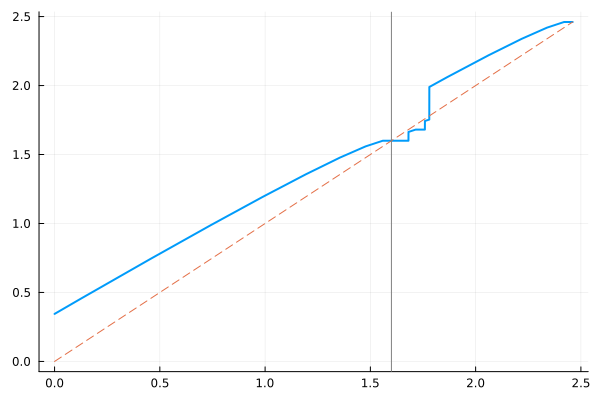

In [32]:
plot_pol(sav)

So there is no clear pattern to which equilibria one converges starting from a finite horizon.

## Converging to the hybrid when the hybrid is the only one

Now we show that is the hybrid equilibrium is the only one, backward iteration converges to it. 

In [33]:
m = TwoStatesModel(δ = 0.012, λ = 0.10, β=0.92)
bor = create_bor_eqm(m)

AssertionError: AssertionError: bor_eqm.valid_until == 1

In [34]:
sav = create_sav_eqm(m)

AssertionError: AssertionError: crisis_borrowing.alloc.v[bS_low_loc] <= vH

In this case, neither the saving nor the borrowing allocations are equilibrium

In [35]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.10028257720505895
Iter 20. Distance=0.14386293925348775
Iter 30. Distance=0.3987208886863225
Iter 40. Distance=0.5189611826070506
Iter 50. Distance=0.5623602954467273
Iter 60. Distance=0.5859781990781915
Iter 70. Distance=0.5989394098289131
Iter 80. Distance=0.6058186366667484
Iter 90. Distance=0.6097334908346294
Iter 100. Distance=0.6119308744043829
Iter 110. Distance=0.00013266141393653008
Iter 120. Distance=7.026348321798048e-5
Iter 130. Distance=3.649415857159832e-5
Iter 140. Distance=2.2705648724752336e-5
Iter 150. Distance=1.3681662911158021e-5
Iter 160. Distance=8.020859192325869e-6
Iter 170. Distance=4.614646175626902e-6
Iter 180. Distance=2.6196402281297715e-6
Iter 190. Distance=1.4726113172769395e-6
Iter 200. Distance=8.21778405157847e-7
Iter 210. Distance=4.5604740372962027e-7
Iter 220. Distance=2.5200890052534675e-7
Iter 230. Distance=1.3880050053760584e-7
Iter 240. Distance=7.62521099040292e-8
Iter 250. Distance=4.1806161032997835e-8
Iter 260. Distance=

Alloc for model: R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.1 δ=0.012 y=1.0 points=10001

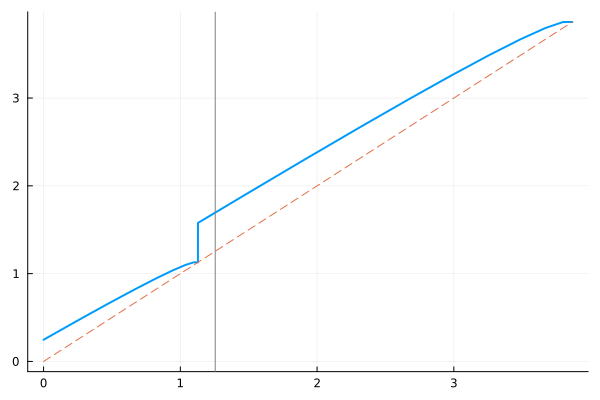

In [36]:
plot_pol(iter_out)

In [37]:
hyb = create_hyb_eqm(m)

Alloc for model: R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.1 δ=0.012 y=1.0 points=10001

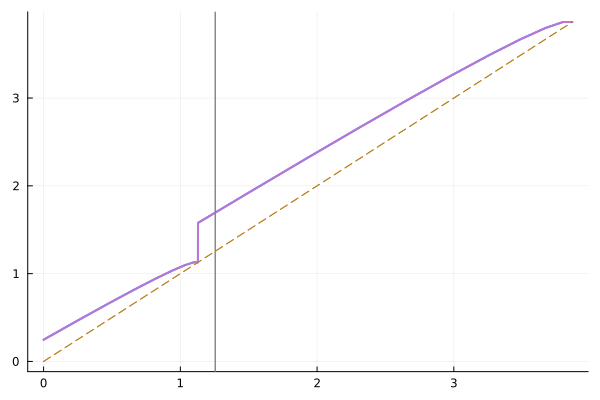

In [38]:
p = plot_pol(hyb)
plot_pol(iter_out, new_figure=false, base_plot=p)

Iterating backwards converges to the hybrid. Which is indeed an equilibrium:

In [39]:
a_tmp = Alloc(m)
iterate_v_and_pol!(a_tmp, hyb)
maximum(abs.(a_tmp.v .- hyb.v))

2.220446049250313e-16

## Parameter map with multiplicity

Now, we are going to identify the region in the space of default cost and maturities where we have multiplicity. 

Here we use CRRA utility so that the computation is faster. 

In [40]:
TwoStatesModel()

R=1.05 β=0.92 τH=0.14 τL=0.06 λ=0.025 δ=0.25 y=1.0 points=10001

In [41]:
mulQ = Dict{Tuple{Float64, Float64}, Tuple{Bool, Bool}}()
@showprogress for invδ in range(0.25, stop=20, length=50)
    for τL in range(0.01, stop=0.04, length=50)
        borQ = true
        savQ = true
        m = TwoStatesModel(δ=1/invδ, τL=τL, τH=0.04, u= (x -> -1/x), u_inv = (x -> -1/x), npoints_approx=500)
        try
            bor = create_bor_eqm(m)
        catch
            borQ = false
        end
        try
            sav = create_sav_eqm(m)
        catch
            savQ = false
        end
        mulQ[(invδ, τL)] = (borQ, savQ)
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


In [42]:
multeqm = [[x[1], x[2]] for x in keys(mulQ) if mulQ[x]==(true, true)]
multeqm = reduce(hcat, multeqm); # array of arrays into a matrix

Doing a plot with the multiplicity region

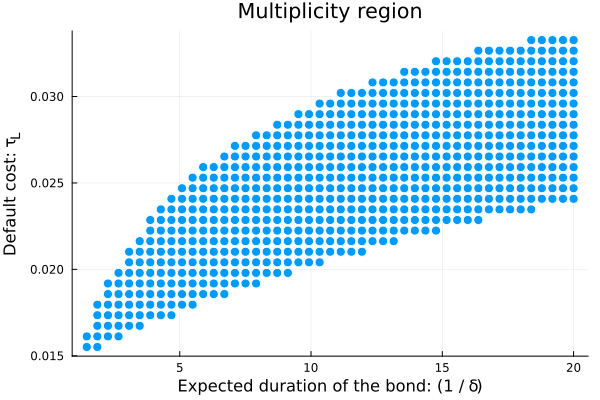

In [43]:
p = scatter(multeqm[1, :], multeqm[2, :], 
    markerstrokecolor="white", markersize=5,
    xlabel="Expected duration of the bond: (1 / \\delta)", 
    ylabel="Default cost: \\tau_{L}",
    title="Multiplicity region", 
    leg=false
)

In [44]:
savefig(p, "multiplicity_region.pdf")

"c:\\Users\\manue\\GitHub\\dilution_with_two_shocks\\multiplicity_region.pdf"

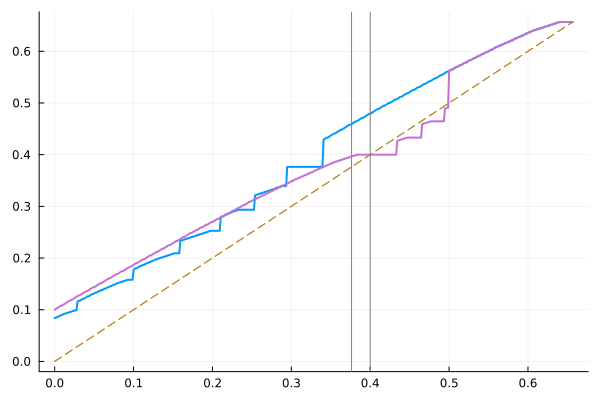

In [45]:
m = TwoStatesModel(δ=0.2, τL=0.02, τH=0.04, u= (x -> -1/x), u_inv = (x -> -1/x), npoints_approx=500)
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)

p = plot_pol(bor)
plot_pol(sav, base_plot=p)